In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

# Original 3D volume
data = [[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
        [[0., 0., 0., 0.],
         [1., 1., 1., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]],
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]

# Watermark (a simple 2x2x2 structure)
watermark = [[[1., 1.],
              [1., 1.]],
             [[1., 1.],
              [1., 1.]]]

wavelet = 'haar'

# Function to resize the watermark to match the approximation coefficients
def resize_watermark(watermark, shape):
    # Convert watermark and approx_coeffs to numpy arrays
    watermark = np.array(watermark)
    return np.kron(watermark, np.ones(np.array(shape) // np.array(watermark.shape)))

# embed le watermark
def embed_watermark(original_data, watermark, alpha=0.000001):
    coefficients = pywt.dwtn(original_data, wavelet, mode='symmetric', axes=None)

    approx_coeffs = coefficients['aaa']

    resized_watermark = resize_watermark(watermark, approx_coeffs.shape)

    scaled_watermark = np.multiply(resized_watermark, alpha)

    watermarked_coeffs = approx_coeffs + scaled_watermark

    coefficients['aaa'] = watermarked_coeffs

    return coefficients

# Extract the watermark
def extract_watermark(data_with_watermark, original_data, alpha=0.001):
    # Extract the approximation coefficients from the DWT
    watermarked_coeffs = data_with_watermark['aaa']

    # Extract the approximation coefficients from the original data
    original_coeffs = pywt.dwtn(original_data, wavelet, mode='symmetric', axes=None)['aaa']

    # Calculate the difference between watermarked and original approximation coefficients
    diff_coeffs = watermarked_coeffs - original_coeffs

    # Extract the watermark by scaling the difference
    extracted_watermark = np.divide(diff_coeffs, alpha)

    return extracted_watermark



In [ ]:
watermarked_data = embed_watermark(data, watermark, alpha=0.000001)
watermarked_data


{'aaa': array([[[0.70810678, 0.35455339],
         [0.70810678, 0.001     ]],
 
        [[0.001     , 0.001     ],
         [0.001     , 0.001     ]]]),
 'aad': array([[[ 0.        ,  0.35355339],
         [-0.70710678,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]]),
 'ada': array([[[-0.70710678, -0.35355339],
         [ 0.        ,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]]),
 'add': array([[[ 0.        , -0.35355339],
         [ 0.        ,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]]),
 'daa': array([[[-0.70710678, -0.35355339],
         [-0.70710678,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]]),
 'dad': array([[[ 0.        , -0.35355339],
         [ 0.70710678,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]]),
 'dda': array([[[0.70710678, 0.35355339],


In [ ]:
# Extract the watermark from the watermarked data
extracted_watermark = extract_watermark(watermarked_data, data, alpha=0.001)

extracted_watermark

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

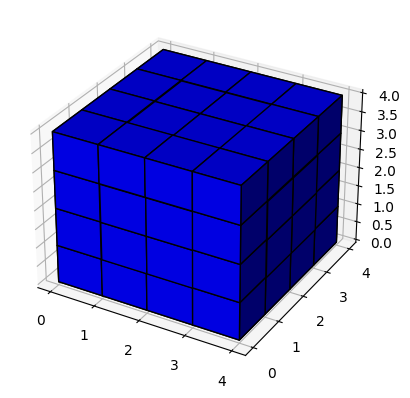

In [ ]:
# Reconstruct wm using IDWT
watermarked_data_reconstructed = pywt.idwtn(watermarked_data, wavelet, mode='symmetric', axes=None)

# Plot wmed data
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(watermarked_data_reconstructed, facecolors='blue', edgecolor='k')
plt.show()

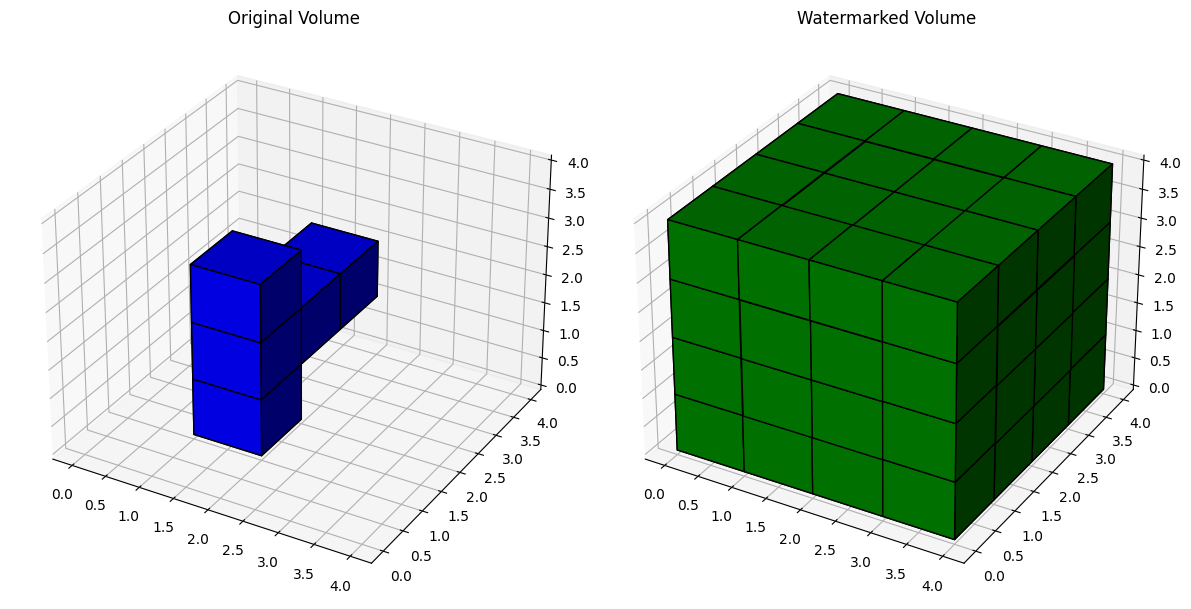

In [ ]:
fig = plt.figure(figsize=(12, 6))
# Plot  original volume
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Original Volume')
ax1.voxels(np.array(data), facecolors='blue', edgecolor='k')

# Plot  wm volume
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Watermarked Volume')
ax2.voxels(watermarked_data_reconstructed, facecolors='green', edgecolor='k')

plt.tight_layout()
plt.show()

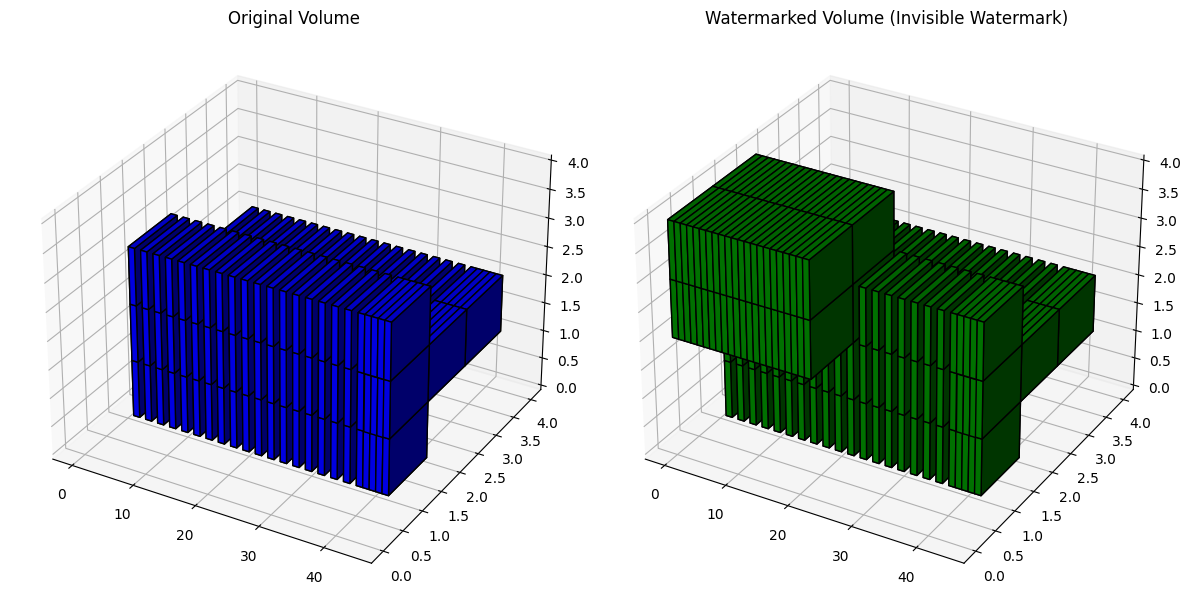

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

#larger wm
data = np.array([[[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                  [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                  [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                  [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                  [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]]])

watermark = np.array([[[0., 1.],
                       [0., 0.]],
                      [[0., 0.],
                       [0., 0.]]])

wavelet = 'haar'

# Embed the watermark into the original data with a very small alpha value
alpha_value = 0.00001
watermarked_coeffs = embed_watermark(data, watermark, alpha=alpha_value)

watermarked_data_reconstructed = reconstruct_watermarked_volume(watermarked_coeffs, wavelet)

# Plot the original and watermarked volumes side by side
fig = plt.figure(figsize=(12, 6))

# Plot the original volume
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Original Volume')
ax1.voxels(data, facecolors='blue', edgecolor='k')

# Plot the wm volume
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Watermarked Volume (Invisible Watermark)')
ax2.voxels(watermarked_data_reconstructed, facecolors='green', edgecolor='k')

plt.tight_layout()
plt.show()

## try transparent plot

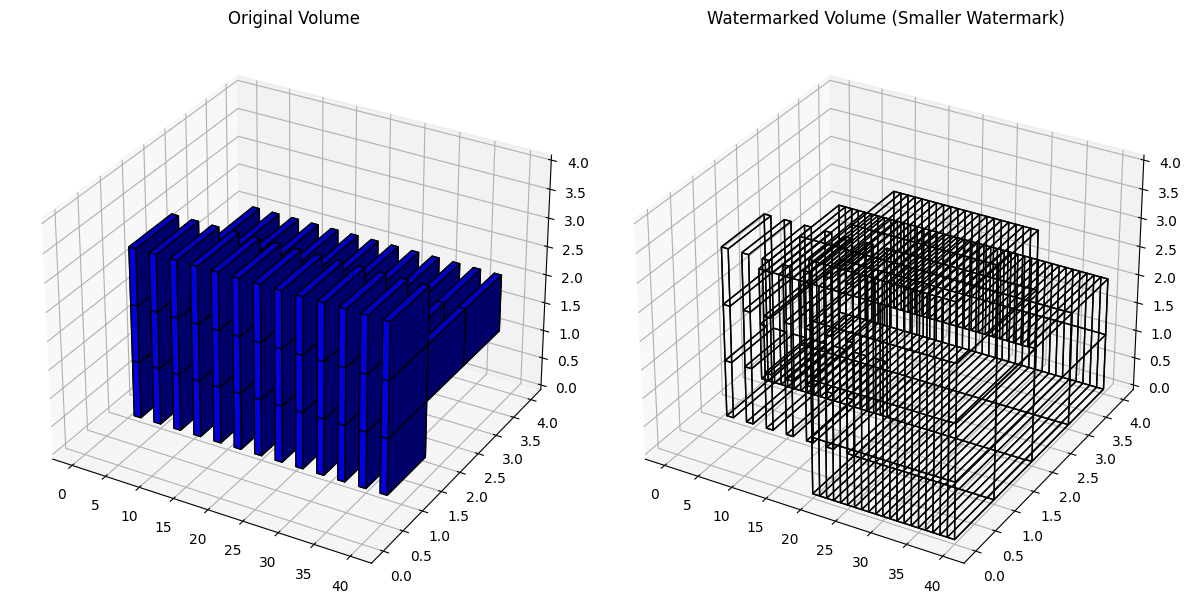

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

data = np.array([[[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [1., 1., 1., 0.],
                  [0., 1., 0., 0.],
                  [0., 1., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]],
                 [[0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.],
                  [0., 0., 0., 0.]]])

watermark = np.array([[[0, 0],
                       [1., 0]],
                      [[1., 1.],
                       [1., 0]]])


alpha_value = 0.0001
watermarked_coeffs = embed_watermark(data, watermark, alpha=alpha_value)

watermarked_data_reconstructed = reconstruct_watermarked_volume(watermarked_coeffs, wavelet)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Original Volume')
ax1.voxels(data, facecolors='blue', edgecolor='k')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Watermarked Volume (Smaller Watermark)')
ax2.voxels(watermarked_data_reconstructed, facecolors='green', edgecolor='k', alpha=0.0001) # Add alpha to make the watermarked region transparent

plt.tight_layout()
plt.show()
